# **7. Logistic Regression II - Multiclass Classification**

We aim to first identify hand-written digits and, in the process, build an image recognition model.

The *Multiclass Logistic Regression* model for the probability of each outcome $A_i$ (where $A_i$ in $V$, a set of nominal outcomes) is defined as:

$$
P(Y = A_i \mid X) = \frac{e^{B_{0i} + B_{1i} X}}{\sum_{j} e^{B_{0j} + B_{1j} X}}
$$

where each class $ A_i $ has its own intercept $ B_{0i} $ and coefficient vector $ B_{1i} $. This formulation ensures that the probabilities sum to 1 across all possible classes in $ V $.


### **Derivation of Multiclass Logistic Regression**

Imagine you’re trying to classify something into one of several categories, like identifying a digit in a picture. The digit could be 0, 1, 2, ... up to 9. Let’s call these possible answers *classes*, and each class is labeled as $A_0, A_1, A_2, \dots, A_9$.

You want a formula that tells you the probability that a given picture shows, say, a "3" rather than a "7."

#### **Step 1: Making a Prediction - A "Score" for Each Class**

In multiclass logistic regression, we start by assigning a *score* to each possible class based on the features we know about the picture. Features could be things like the brightness of certain pixels, the size of certain shapes, etc.

We create a score for each class using a formula that looks like:
$$
B_{0i} + B_{1i} X
$$
where:
- $X$ represents all the features of the picture,
- $B_{0i}$ is a starting number (like a base score) for class $A_i$,
- $B_{1i}$ adjusts this score based on the picture's features.

Each class has its own unique values of $B_{0i}$ and $B_{1i}$, so we get a different score for each class.

#### **Step 2: Turning Scores into Probabilities - The Exponential Trick**

To turn these scores into probabilities, we use a trick involving the exponential function $e^{\text{score}}$. Why? Because exponentials make sure all scores are positive and grow really fast, making it easier to work with.

So, for each class $A_i$, we calculate:
$$
e^{B_{0i} + B_{1i} X}
$$

#### **Step 3: The Softmax Function - Making It All Add Up to 1**

Now, we want these numbers to act like probabilities, meaning they should add up to 1. Here’s how we do it:

1. **Calculate exponentials for all classes** (one for each possible digit).
2. **Add up all these exponentials** to get a grand total.
3. **Divide each individual exponential by this grand total**.

This makes each score a fraction of the total, and when we add up all these fractions, they’ll perfectly equal 1, just like probabilities should.

So, the probability of each class $A_i$ (for example, the chance that the digit is "3") is given by:
$$
P(Y = A_i \mid X) = \frac{e^{B_{0i} + B_{1i} X}}{\sum_{j} e^{B_{0j} + B_{1j} X}}
$$

#### **Why This Works**

The denominator (bottom part) of the fraction sums up all the exponentials for each possible class, making sure each probability is balanced relative to the others. The numerator (top part) is just the exponential for the specific class we’re interested in.

By dividing each individual score by the total, we make sure we end up with numbers that add up to 1 and can be interpreted as probabilities.

#### **Summary**

To sum it all up:
- We score each class with a number based on the features of the picture.
- We exponentiate these scores to make them positive and highlight differences.
- We divide each exponentiated score by the total of all scores to get a probability for each class.

This process, called the *softmax function*, allows us to take raw scores and turn them into probabilities for each class.


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

### **1. Creating an Image Classification Model using the 'digits' dataset**

The `load_digits()` function from the `sklearn.datasets` module loads the Digits dataset, which is used for digit recognition tasks. This dataset is not a DataFrame but an object of type `Bunch`. This object behaves like a dictionary and contains several attributes.

Here are some key components of the `digits` object:

- **`digits.data`**: A 2D NumPy array of shape (n_samples, n_features), where each row represents a sample (a digit image) and each column represents a pixel.
- **`digits.target`**: A 1D NumPy array of shape (n_samples,) that contains the label (0-9) corresponding to each digit image.
- **`digits.images`**: A 3D NumPy array of shape (n_samples, 8, 8), representing the actual images of the digits in an 8x8 format.
- **`digits.DESCR`**: A string describing the dataset.


In [27]:
digits  = load_digits()
type(digits)
digits.data[0] # first sample; it's comprised of 8x8 = 64 values representing 64 pixels

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Digit data: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
Digit target: 0


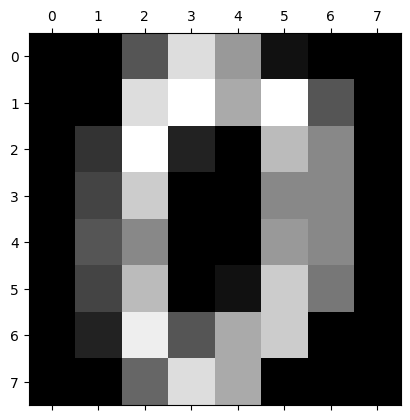

Digit data: [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
Digit target: 1


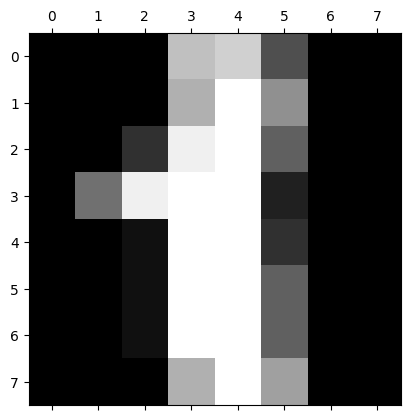

Digit data: [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
  8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
 15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
  5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
Digit target: 2


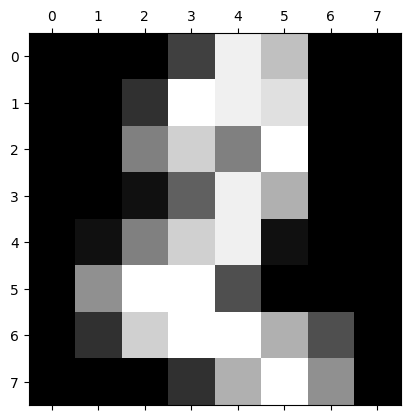

Digit data: [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
  1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
 12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.  8.  4.  5. 14.
  9.  0.  0.  0.  7. 13. 13.  9.  0.  0.]
Digit target: 3


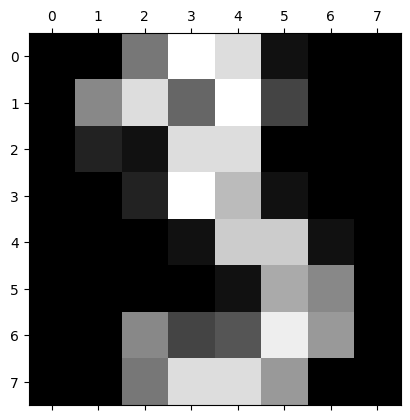

Digit data: [ 0.  0.  0.  1. 11.  0.  0.  0.  0.  0.  0.  7.  8.  0.  0.  0.  0.  0.
  1. 13.  6.  2.  2.  0.  0.  0.  7. 15.  0.  9.  8.  0.  0.  5. 16. 10.
  0. 16.  6.  0.  0.  4. 15. 16. 13. 16.  1.  0.  0.  0.  0.  3. 15. 10.
  0.  0.  0.  0.  0.  2. 16.  4.  0.  0.]
Digit target: 4


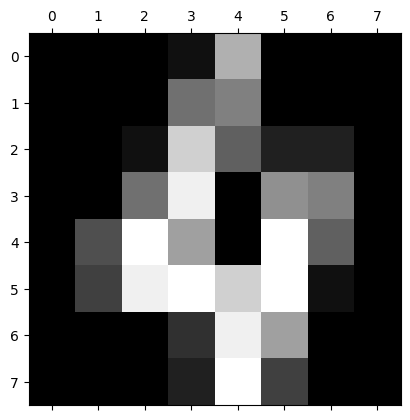

In [28]:
# Plot the first 5 samples
for i in range(5):
    print(f"Digit data: {digits.data[i]}")
    print(f"Digit target: {digits.target[i]}")
    plt.matshow(digits.images[i])
    plt.show()

We will use the '**data**' and '**target**' columns to build an image recognition model. The model will take '**data**' as input and '**target**' as output $Y$ variable.

In [29]:
# 1. Split data intro train and test
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=4)

In [30]:
# 2. Set up model
model = LogisticRegression(max_iter=1000)

In [31]:
# 3. Fit and train model
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [32]:
# 4. Create predictions
y_pred = model.predict(X_test)
y_pred

array([8, 7, 0, 5, 3, 5, 1, 3, 1, 8, 2, 7, 8, 4, 7, 7, 8, 3, 0, 6, 9, 7,
       1, 0, 8, 6, 8, 1, 0, 0, 0, 2, 7, 1, 1, 7, 6, 3, 2, 3, 4, 2, 9, 5,
       2, 0, 0, 7, 3, 3, 2, 9, 7, 6, 1, 8, 5, 8, 6, 7, 5, 6, 9, 3, 1, 4,
       1, 9, 7, 8, 4, 1, 2, 4, 1, 6, 6, 7, 8, 1, 2, 6, 9, 1, 7, 4, 2, 6,
       7, 3, 7, 5, 4, 8, 5, 1, 5, 6, 7, 1, 2, 5, 5, 2, 0, 8, 5, 1, 2, 3,
       0, 4, 5, 6, 9, 3, 9, 5, 7, 4, 7, 8, 9, 4, 9, 7, 9, 7, 9, 4, 3, 0,
       5, 4, 9, 2, 9, 2, 9, 6, 2, 6, 0, 5, 5, 8, 9, 2, 4, 3, 4, 4, 2, 0,
       9, 8, 4, 3, 6, 6, 2, 9, 7, 1, 5, 7, 6, 0, 5, 3, 2, 3, 1, 3, 2, 6,
       6, 0, 8, 2, 5, 7, 6, 8, 4, 6, 2, 2, 0, 4, 0, 3, 0, 4, 0, 1, 5, 6,
       4, 7, 1, 5, 4, 5, 5, 3, 4, 4, 6, 3, 7, 1, 1, 3, 1, 7, 5, 0, 1, 9,
       5, 0, 8, 7, 4, 0, 6, 6, 5, 0, 2, 4, 2, 9, 4, 0, 6, 2, 9, 1, 9, 6,
       3, 9, 0, 8, 3, 1, 2, 1, 3, 2, 0, 9, 0, 7, 5, 9, 1, 8, 6, 9, 6, 8,
       8, 6, 2, 4, 5, 9, 9, 1, 5, 2, 8, 4, 7, 9, 8, 8, 0, 1, 7, 3, 2, 2,
       1, 0, 3, 2, 3, 9, 7, 2, 0, 0, 1, 2, 6, 0, 9,

In [33]:
# 5. Evaluate model score
model.score(X_test, y_test)

0.9694444444444444

In [34]:
# 6. Evaluate the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[38,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 31,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 31,  0,  1,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 36,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0, 37,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 34,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  1],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 35]])

Text(50.722222222222214, 0.5, 'Truth')

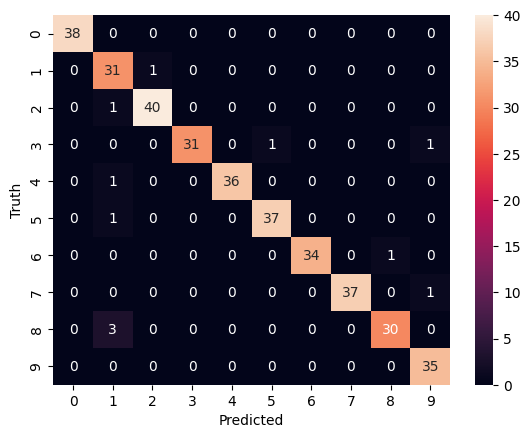

In [35]:
# 7. Create a Confusion Matrix heatmap
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### **2. Building a Classification model using the Iris dataset**

We'll now use the same process to build a classification model for the '**iris**' dataset. It will take in the '**Sepal Length**', '**Sepal Width**', '**Petal Length**' and '**Petal Width**' as inputs and classify the '**Species**' of the plant.

In [47]:
# Load data
iris = pd.read_csv('https://raw.githubusercontent.com/venky14/Machine-Learning-with-Iris-Dataset/refs/heads/master/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
# Let's use the ID column as index
iris.set_index('Id', inplace=True)
iris.head()
X = iris.drop('Species', axis=1)
y = iris['Species']

In [38]:
# 2. Test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [49]:
# 3. Set up model
model_iris = LogisticRegression()

In [50]:
# 4. Fit and train model
model_iris.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
# 5. Create predictions
y_pred = model_iris.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica'],
      dtype=object)

In [52]:
# 5. Evaluate model score
model_iris.score(X_test, y_test)

0.9666666666666667

In [54]:
# 6. Create Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=iris['Species'].unique())
print(cm)

[[16  0  0]
 [ 0  4  1]
 [ 0  0  9]]


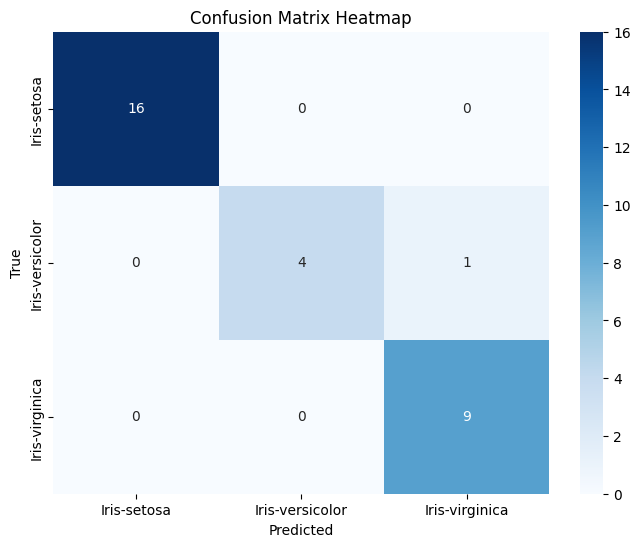

In [56]:
# 7. Create Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris['Species'].unique(),
            yticklabels=iris['Species'].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Looks like the model incorrectly classified a Versicolor as a Virginica


### Understanding the Confusion Matrix

1. **First Row (Setosa)**:
   - **True Positives (TP)**: **16** Setosas were correctly predicted as Setosa. This means your model correctly identified 16 flowers as Setosa.
   - **False Positives (FP)**: **0** flowers were incorrectly predicted as Setosa. This means there were no Versicolor or Virginica flowers incorrectly labeled as Setosa.
   - **False Negatives (FN)**: **0** Setosa flowers were incorrectly predicted as either Versicolor or Virginica.

   **Summary**: The model is perfect at identifying Setosa flowers.

2. **Second Row (Versicolor)**:
   - **True Positives (TP)**: **4** Versicolor flowers were correctly predicted as Versicolor.
   - **False Positives (FP)**: **0** flowers were incorrectly predicted as Versicolor. No flowers were wrongly classified as Versicolor.
   - **False Negatives (FN)**: **1** Versicolor flower was incorrectly predicted as Virginica. This means one Versicolor flower was misclassified.

   **Summary**: The model is mostly good at identifying Versicolor flowers, but it misclassified one as Virginica.

3. **Third Row (Virginica)**:
   - **True Positives (TP)**: **9** Virginica flowers were correctly predicted as Virginica.
   - **False Positives (FP)**: **0** flowers were incorrectly predicted as Virginica. No flowers of other types were wrongly classified as Virginica.
   - **False Negatives (FN)**: **0** Virginica flowers were incorrectly predicted as either Setosa or Versicolor.

   **Summary**: The model is perfect at identifying Virginica flowers.

### **Overall Performance**

- **Accuracy**: You can calculate the overall accuracy of your model by adding all the true positives and dividing by the total number of predictions. In your case:
  
$$
\text{Accuracy} = \frac{16 + 4 + 9}{16 + 0 + 0 + 0 + 4 + 1 + 0 + 0 + 9} = \frac{29}{30} \approx 96.67\%
$$

- **Model Strengths**: Your model performs exceptionally well, especially for Setosa and Virginica.
- **Room for Improvement**: The model made one mistake with Versicolor, so there may be a need for more training data or refining your model to improve predictions for that class.

### **Summary**

Your confusion matrix shows that your model is quite good at distinguishing between the three types of Iris flowers, with very few misclassifications. This analysis can help you understand how to further improve the model if necessary.